# Projet : Mise en œuvre d'un modèle de Machine Learning avec TensorFlow

Ce notebook couvre toutes les étapes nécessaires pour développer un modèle de détection de fraude par carte bancaire, depuis le traitement des données jusqu'à l'évaluation du modèle.

## Chargement des données

Nous utilisons le dataset `Credit Card Fraud Detection` disponible sur Kaggle.

In [95]:

import pandas as pd

# Chargement des données
data = pd.read_csv('creditcard.csv')
print(data.head())
print(data.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## Préparation des données

### Nettoyage des données et exploration initiale

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

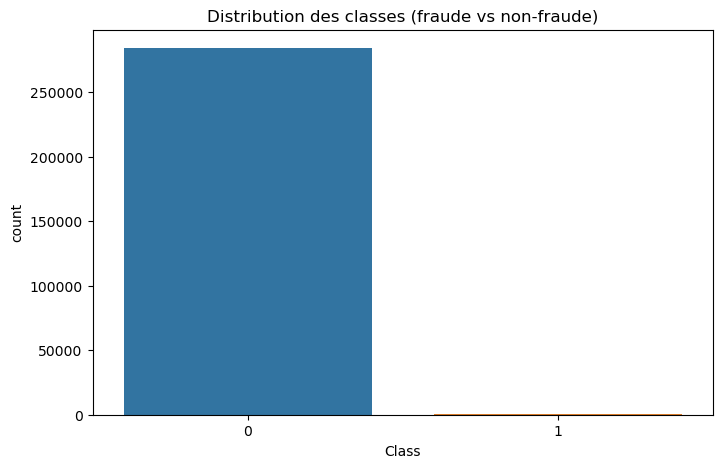

In [96]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Chargement des données
data = pd.read_csv('creditcard.csv')
print(data.head())
print(data.info())

# Normalisation des données numériques
scaler = StandardScaler()
data['scaled_amount'] = scaler.fit_transform(data[['Amount']])
data['scaled_time'] = scaler.fit_transform(data[['Time']])
data = data.drop(['Time', 'Amount'], axis=1)

# Exploration rapide des classes
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

print("Nombre de transactions frauduleuses :", len(fraud))
print("Nombre de transactions non frauduleuses :", len(non_fraud))
print("Pourcentage de transactions frauduleuses :", len(fraud) / len(data) * 100)
print("Pourcentage de transactions non frauduleuses :", len(non_fraud) / len(data) * 100)


# Visualisation avec seaborn countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=data)
plt.title('Distribution des classes (fraude vs non-fraude)')
plt.show()

### Gestion du déséquilibre des classes avec SMOTE

In [97]:
from imblearn.over_sampling import SMOTE

# Séparation des caractéristiques et étiquettes
X = data.drop('Class', axis=1)
y = data['Class']

# Application de SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribution après SMOTE :")
print(y_resampled.value_counts())

Distribution après SMOTE :
0    284315
1    284315
Name: Class, dtype: int64


## Mise en place de l'architecture du modèle

Créons un réseau de neurones avec TensorFlow.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l1_l2

# Création du modèle
model = Sequential([
    Input(shape=(X_resampled.shape[1],)),
    Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),  # Ajout de la régularisation L1 et L2
    Dropout(0.5),  # Augmentation du taux de dropout
    Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),  # Ajout de la régularisation L1 et L2
    Dropout(0.5),  # Ajout d'une couche de dropout supplémentaire
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Entraînement
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 71s 5ms/step - accuracy: 0.9156 - loss: 0.3441 - val_accuracy: 0.9660 - val_loss: 0.1330
Epoch 2/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 65s 5ms/step - accuracy: 0.9572 - loss: 0.1563 - val_accuracy: 0.9694 - val_loss: 0.1136
Epoch 3/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - accuracy: 0.9633 - loss: 0.1392 - val_accuracy: 0.9825 - val_loss: 0.1014
Epoch 4/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 0.9647 - loss: 0.1325 - val_accuracy: 0.9863 - val_loss: 0.0965
Epoch 5/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.9660 - loss: 0.1275 - val_accuracy: 0.9870 - val_loss: 0.0939
Epoch 6/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9662 - loss: 0.1267 - val_accuracy: 0.9853 - val_loss: 0.0914
Epoch 7/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.9661 - loss: 0.1266 - val_accuracy: 0.9853 - val_loss: 0.0959
Epoch 8/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 

## Entraînement du modèle

Nous entraînons le modèle sur l'ensemble d'entraînement et utilisons la validation croisée.

In [ ]:
from sklearn.model_selection import train_test_split

# Séparation des ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entraînement
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 55s 4ms/step - accuracy: 0.9655 - loss: 0.1247 - val_accuracy: 0.9900 - val_loss: 0.0903
Epoch 2/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 87s 4ms/step - accuracy: 0.9661 - loss: 0.1253 - val_accuracy: 0.9882 - val_loss: 0.0883
Epoch 3/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 60s 4ms/step - accuracy: 0.9661 - loss: 0.1226 - val_accuracy: 0.9887 - val_loss: 0.0863
Epoch 4/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9666 - loss: 0.1236 - val_accuracy: 0.9833 - val_loss: 0.0949
Epoch 5/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step - accuracy: 0.9653 - loss: 0.1248 - val_accuracy: 0.9889 - val_loss: 0.0848
Epoch 6/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - accuracy: 0.9660 - loss: 0.1240 - val_accuracy: 0.9884 - val_loss: 0.0873
Epoch 7/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 61s 4ms/step - accuracy: 0.9662 - loss: 0.1228 - val_accuracy: 0.9905 - val_loss: 0.0858
Epoch 8/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 

## Évaluation du modèle

Calcul des métriques de performance et visualisation des résultats.

In [ ]:
# Tracé de la perte et de la précision d'entraînement et de validation
plt.figure(figsize=(12, 5))

# Tracé de la perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolution de la perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Tracé de la précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Évolution de la précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



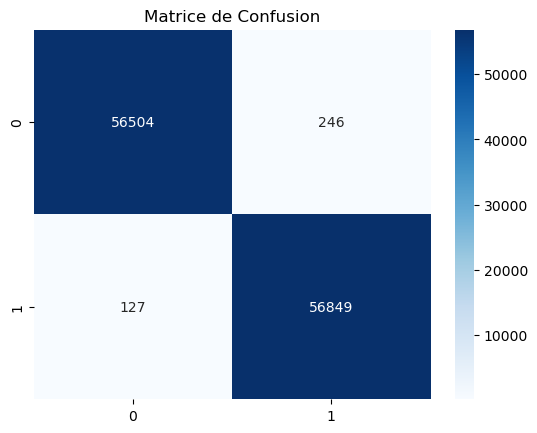

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Prédictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Rapport de classification
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion")
plt.show()

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


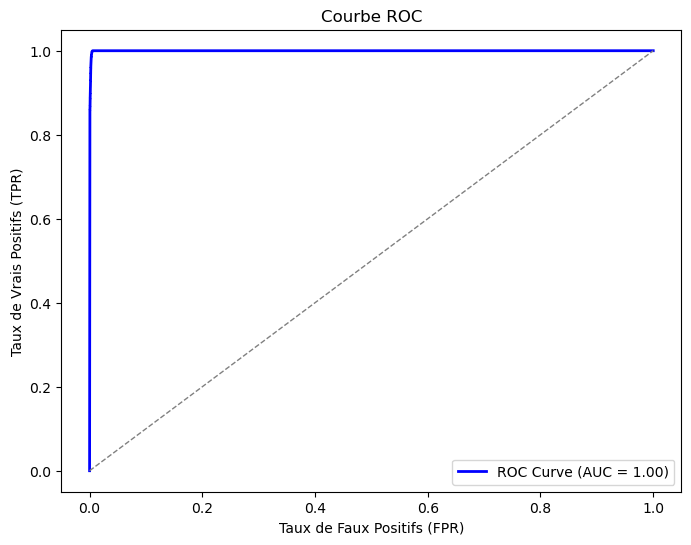

In [ ]:
from sklearn.metrics import roc_curve, auc

# Prédire les probabilités pour l'ensemble de test
y_pred_prob = model.predict(X_test)

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.title('Courbe ROC')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')
plt.show()